In [ ]:
##Import the requred libraries

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [ ]:
# #Import csv file to colab
from google.colab import files
uploaded = files.upload()

Saving datasets_302666_618181_AAPL.csv to datasets_302666_618181_AAPL.csv


In [ ]:
# #Creating pandas df
import io
df = pd.read_csv(io.BytesIO(uploaded['datasets_302666_618181_AAPL.csv']))

In [ ]:
from pandas.tseries.offsets import BDay

Series has to be read as a daily series with Mon-Friday as weekdays, hence frequency is defined as Bday().. Else if you define frequency as 365, it would assume that exchange was working for all 365 days


In [ ]:
#df=pd.read_csv('D:/Academic Operations/DSBA - Python/Online/Time Series Forecasting/Mentored Learning Session/Week 4_E2E/Rishabh/datasets_302666_618181_AAPL.csv')

In [ ]:
df.shape

(251, 7)

In [ ]:
df.head()

Date        Open        High  ...       Close   Adj Close    Volume
0  15-08-2018  209.220001  210.740005  ...  210.240005  207.027420  28807600
1  16-08-2018  211.750000  213.809998  ...  213.320007  210.060333  28500400
2  17-08-2018  213.440002  217.949997  ...  217.580002  214.255234  35427000
3  20-08-2018  218.100006  219.179993  ...  215.460007  212.167633  30287700
4  21-08-2018  216.800003  217.190002  ...  215.039993  211.754028  26159800

[5 rows x 7 columns]

In [ ]:
# We have considered Volume as a dependent variable for this session. Readers are advised to look at Adj. Close and Open price as dependent variable for univariate Time Series Prediction
df_date = df[['Date','Volume']]

In [ ]:
date1 = pd.date_range(start='8/15/2018', end='8/14/2019', freq=BDay())

In [ ]:
date1

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=261, freq='B')

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [ ]:
date = pd.date_range(start='8/15/2018', end='8/14/2019', freq=us_bd)

In [ ]:
date

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=251, freq='C')

In [ ]:
df_date['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
df_date.head()
df_date.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date    Volume Time_Stamp
246  08-08-2019  27009500 2019-08-08
247  09-08-2019  24619700 2019-08-09
248  12-08-2019  22474900 2019-08-12
249  13-08-2019  47218500 2019-08-13
250  14-08-2019  36453100 2019-08-14

In [ ]:
rcParams['figure.figsize'] = 15,8

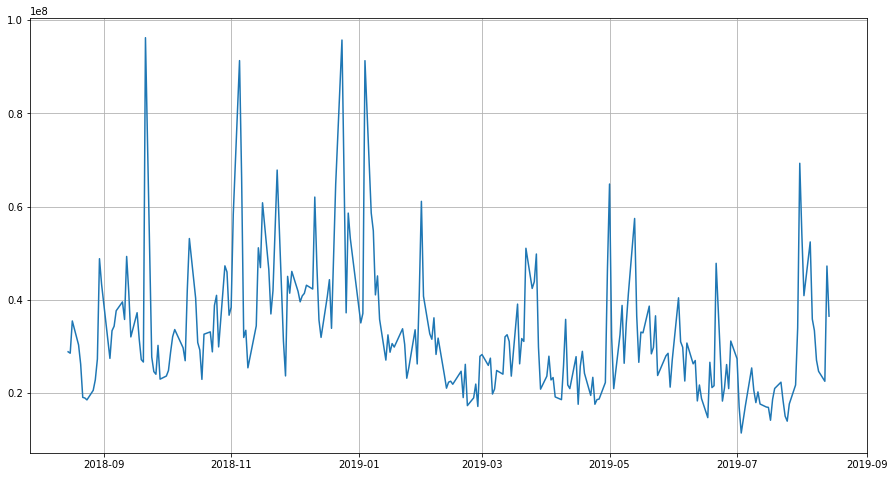

In [ ]:
plt.plot(df_date['Time_Stamp'],df_date['Volume']);
plt.grid()

In [ ]:
df_date.describe()

Volume
count  2.510000e+02
mean   3.289967e+07
std    1.385336e+07
min    1.136200e+07
25%    2.329740e+07
50%    2.985580e+07
75%    3.927970e+07
max    9.624670e+07

In [ ]:
#df_final = pd.read_csv('D::/Academic Operations/DSBA - Python/Online/Time Series Forecasting/Mentored Learning Session/Week 4_E2E/Rishabh/datasets_302666_618181_AAPL.csv',parse_dates=True,squeeze=True,index_col=0)

In [ ]:
## Alternate way of reading the data as time series.
## Squeese = True will return the index col as series
df_final = pd.read_csv("datasets_302666_618181_AAPL.csv",parse_dates=True,squeeze=True,index_col=0)

In [ ]:
df_final.head()

Open        High  ...   Adj Close    Volume
Date                                ...                      
2018-08-15  209.220001  210.740005  ...  207.027420  28807600
2018-08-16  211.750000  213.809998  ...  210.060333  28500400
2018-08-17  213.440002  217.949997  ...  214.255234  35427000
2018-08-20  218.100006  219.179993  ...  212.167633  30287700
2018-08-21  216.800003  217.190002  ...  211.754028  26159800

[5 rows x 6 columns]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [ ]:
rcParams['figure.figsize'] = 15,8

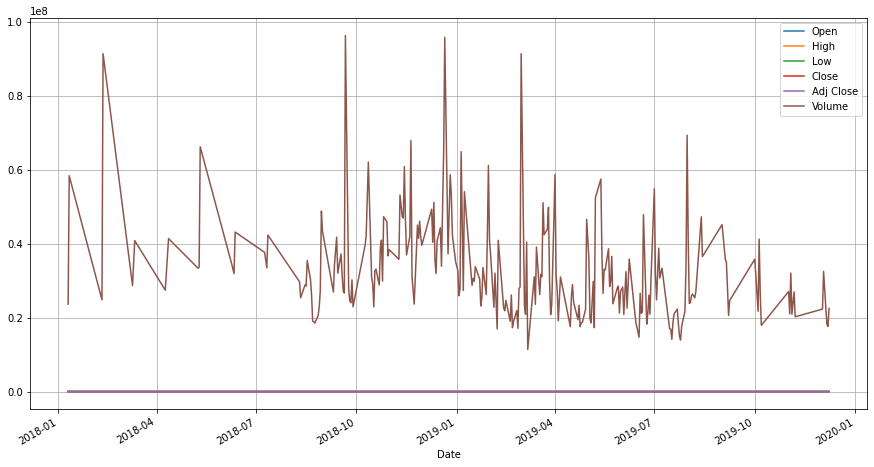

In [ ]:

df_final.plot();
plt.grid()

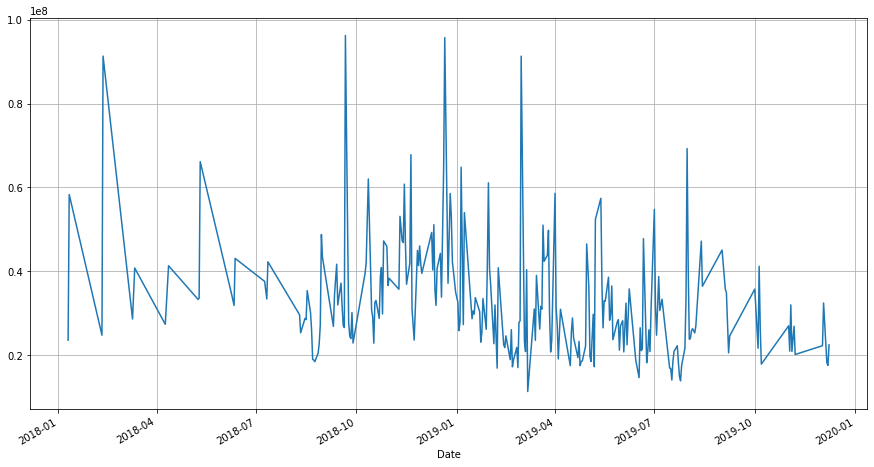

In [ ]:
df_final['Volume'].plot();
plt.grid()

Yearly Plot

# Plot the boxplot of the 'Volume' variable with respect to the different years.

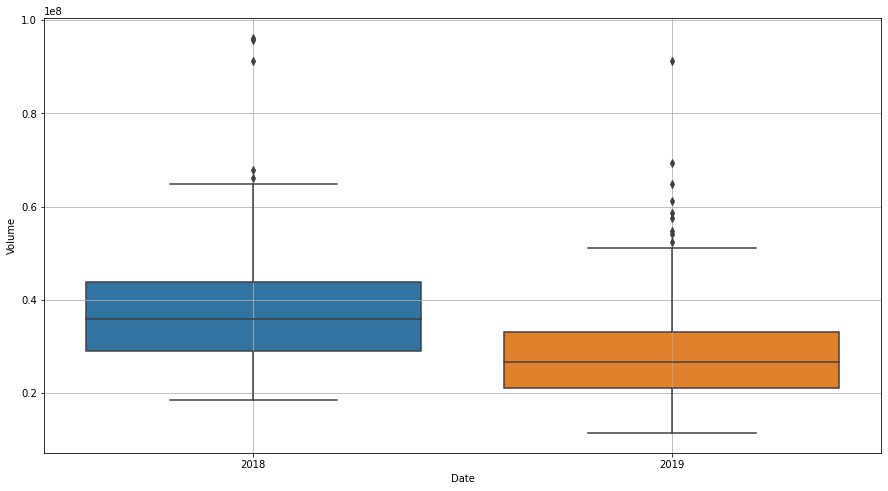

In [ ]:
sns.boxplot(x = df_final.index.year,y = df_final['Volume'])
plt.grid();

In [ ]:
df_date.head()
df_date.tail()


Date    Volume Time_Stamp
246  08-08-2019  27009500 2019-08-08
247  09-08-2019  24619700 2019-08-09
248  12-08-2019  22474900 2019-08-12
249  13-08-2019  47218500 2019-08-13
250  14-08-2019  36453100 2019-08-14

In [ ]:
df_date['Time_Stamp'] = pd.to_datetime(df_date['Time_Stamp'])
df_model = df_date.set_index('Time_Stamp')
df_model.drop(['Date'], axis=1, inplace=True)
df_model.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Volume
Time_Stamp          
2019-08-08  27009500
2019-08-09  24619700
2019-08-12  22474900
2019-08-13  47218500
2019-08-14  36453100

# Plot the boxplot of the 'Volume' variable with respect to months of different.





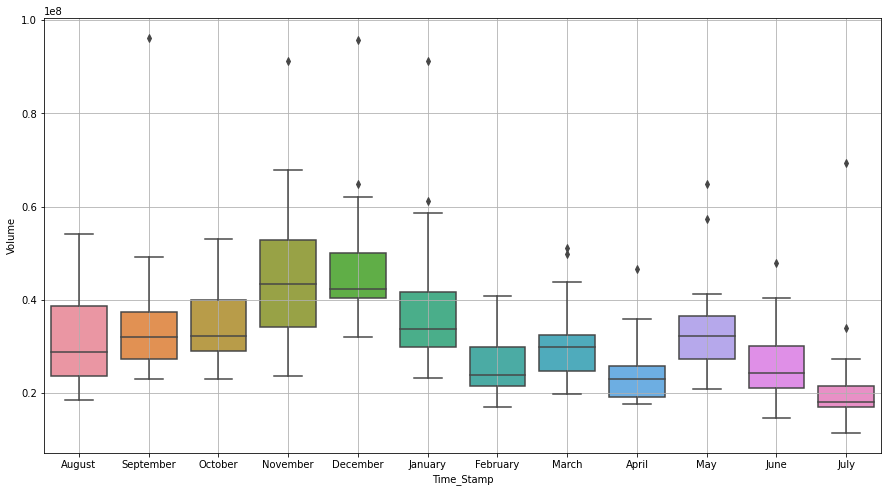

In [ ]:
sns.boxplot(x = df_model.index.month_name(),y = df_final['Volume'])
plt.grid();

# Decompose the 'Volume' variable Time Series.

In [ ]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



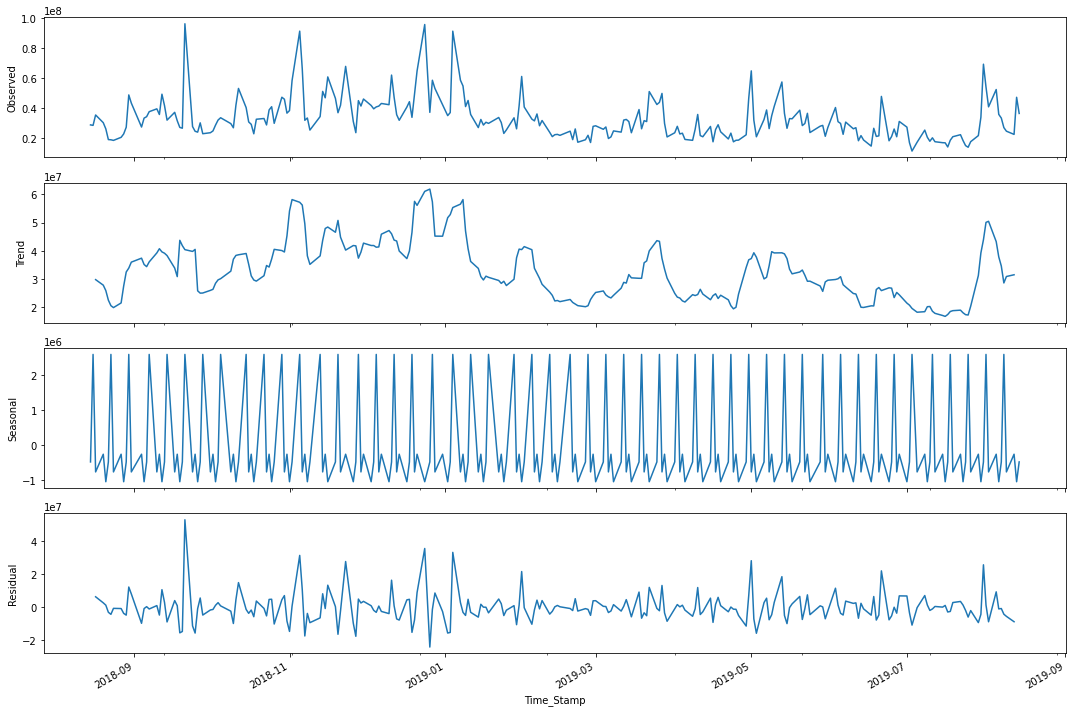

In [ ]:
rcParams['figure.figsize'] = 15,10
decomposition = seasonal_decompose(df_model,model='additive', freq=5)
decomposition.plot();

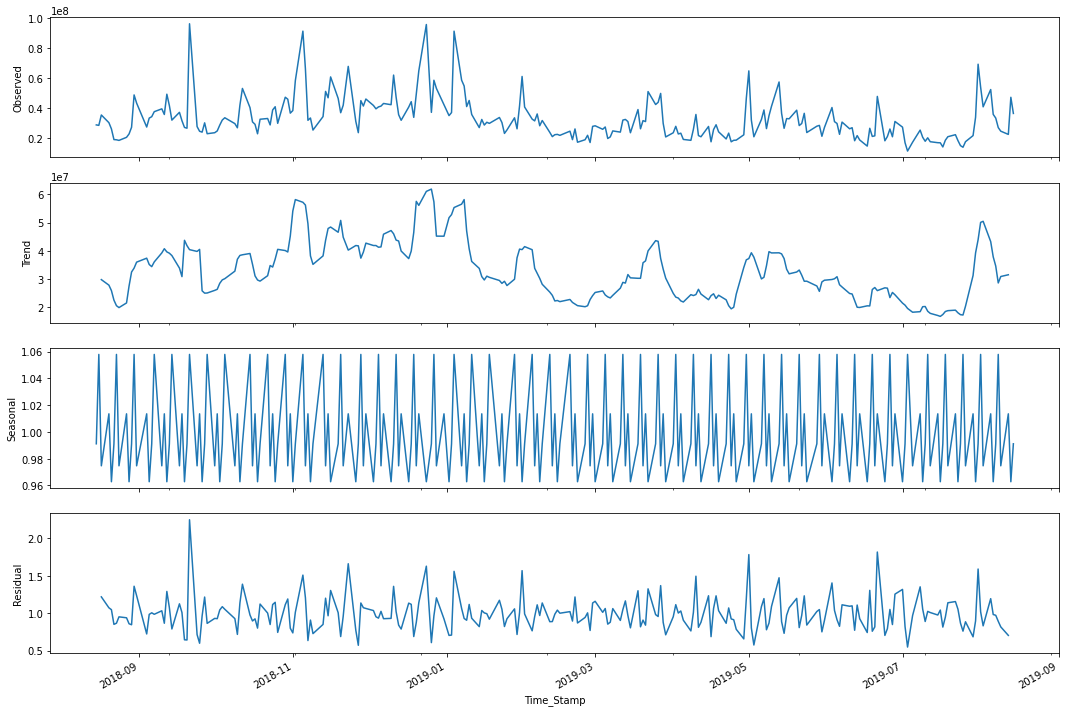

In [ ]:
rcParams['figure.figsize'] = 15,10
decomposition = seasonal_decompose(df_model,model='multiplicative', freq=5)
decomposition.plot();

So series is Additive

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
                 Volume
Time_Stamp            
2018-08-15         NaN
2018-08-16         NaN
2018-08-17  29836500.0
2018-08-20  27878600.0
2018-08-21  25955160.0
2018-08-22  22565040.0
2018-08-23  20612520.0
2018-08-24  19935920.0
2018-08-27  21583260.0
2018-08-28  27565380.0
2018-08-29  32538120.0
2018-08-30  33911120.0 

Seasonality 
               Volume
Time_Stamp          
2018-08-15  0.991134
2018-08-16  1.057854
2018-08-17  0.974697
2018-08-20  1.013504
2018-08-21  0.962811
2018-08-22  0.991134
2018-08-23  1.057854
2018-08-24  0.974697
2018-08-27  1.013504
2018-08-28  0.962811
2018-08-29  0.991134
2018-08-30  1.057854 

Residual 
               Volume
Time_Stamp          
2018-08-15       NaN
2018-08-16       NaN
2018-08-17  1.218195
2018-08-20  1.071939
2018-08-21  1.046814
2018-08-22  0.850352
2018-08-23  0.866002
2018-08-24  0.950848
2018-08-27  0.938302
2018-08-28  0.858198
2018-08-29  0.845120
2018-08-30  1.360181 



In [ ]:
# Split the data into training and test set before building the models.

In [ ]:
### We will consider the original dataset and subseqeuntly we would require exogeneous variables

df['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
df.head()
df.tail()

Date        Open        High  ...   Adj Close    Volume  Time_Stamp
246  08-08-2019  200.199997  203.529999  ...  202.659988  27009500  2019-08-08
247  09-08-2019  201.300003  202.759995  ...  200.990005  24619700  2019-08-09
248  12-08-2019  199.619995  202.050003  ...  200.479996  22474900  2019-08-12
249  13-08-2019  201.020004  212.139999  ...  208.970001  47218500  2019-08-13
250  14-08-2019  203.160004  206.440002  ...  202.750000  36453100  2019-08-14

[5 rows x 8 columns]

In [ ]:
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df_final_model = df.set_index('Time_Stamp')
#df_final_model.drop(['Date'], axis=1, inplace=True)
df_final_model

Date        Open  ...   Adj Close    Volume
Time_Stamp                          ...                      
2018-08-15  15-08-2018  209.220001  ...  207.027420  28807600
2018-08-16  16-08-2018  211.750000  ...  210.060333  28500400
2018-08-17  17-08-2018  213.440002  ...  214.255234  35427000
2018-08-20  20-08-2018  218.100006  ...  212.167633  30287700
2018-08-21  21-08-2018  216.800003  ...  211.754028  26159800
...                ...         ...  ...         ...       ...
2019-08-08  08-08-2019  200.199997  ...  202.659988  27009500
2019-08-09  09-08-2019  201.300003  ...  200.990005  24619700
2019-08-12  12-08-2019  199.619995  ...  200.479996  22474900
2019-08-13  13-08-2019  201.020004  ...  208.970001  47218500
2019-08-14  14-08-2019  203.160004  ...  202.750000  36453100

[251 rows x 7 columns]

In [ ]:
# Split the series into train and test
df_final_model['Month'] = df_final_model.index.month
df_final_model['Year'] = df_final_model.index.year
df_final_model.head()

Date        Open        High  ...    Volume  Month  Year
Time_Stamp                                      ...                       
2018-08-15  15-08-2018  209.220001  210.740005  ...  28807600      8  2018
2018-08-16  16-08-2018  211.750000  213.809998  ...  28500400      8  2018
2018-08-17  17-08-2018  213.440002  217.949997  ...  35427000      8  2018
2018-08-20  20-08-2018  218.100006  219.179993  ...  30287700      8  2018
2018-08-21  21-08-2018  216.800003  217.190002  ...  26159800      8  2018

[5 rows x 9 columns]

In [ ]:
df_final_model.tail()

Date        Open        High  ...    Volume  Month  Year
Time_Stamp                                      ...                       
2019-08-08  08-08-2019  200.199997  203.529999  ...  27009500      8  2019
2019-08-09  09-08-2019  201.300003  202.759995  ...  24619700      8  2019
2019-08-12  12-08-2019  199.619995  202.050003  ...  22474900      8  2019
2019-08-13  13-08-2019  201.020004  212.139999  ...  47218500      8  2019
2019-08-14  14-08-2019  203.160004  206.440002  ...  36453100      8  2019

[5 rows x 9 columns]

In [ ]:
df.tail()

Date        Open        High  ...   Adj Close    Volume  Time_Stamp
246  08-08-2019  200.199997  203.529999  ...  202.659988  27009500  2019-08-08
247  09-08-2019  201.300003  202.759995  ...  200.990005  24619700  2019-08-09
248  12-08-2019  199.619995  202.050003  ...  200.479996  22474900  2019-08-12
249  13-08-2019  201.020004  212.139999  ...  208.970001  47218500  2019-08-13
250  14-08-2019  203.160004  206.440002  ...  202.750000  36453100  2019-08-14

[5 rows x 8 columns]

In [ ]:
n = len(df_final_model)
train =df_final_model[0:int(n*0.83)]
train.shape

(208, 9)

In [ ]:
# train= df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2019-06-14')]
# train.shape

In [ ]:
test = df_final_model[int(n*0.83):]
test.shape


(43, 9)

In [ ]:
# test= df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2019-06-14')]
# test.shape

In [ ]:
train_final = train[['Volume']]
test_final=test[['Volume']]


In [ ]:
print(train_final.shape)
print(test_final.shape)

(208, 1)
(43, 1)


In [ ]:
train_final.tail()

Volume
Time_Stamp          
2019-06-07  30684400
2019-06-10  26220900
2019-06-11  26932900
2019-06-12  18253200
2019-06-13  21674600

In [ ]:
test_final.tail()

Volume
Time_Stamp          
2019-08-08  27009500
2019-08-09  24619700
2019-08-12  22474900
2019-08-13  47218500
2019-08-14  36453100

# Check for stationarity of the series at $\alpha$ = 0.05 using appropriate statistical tests.

In [ ]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

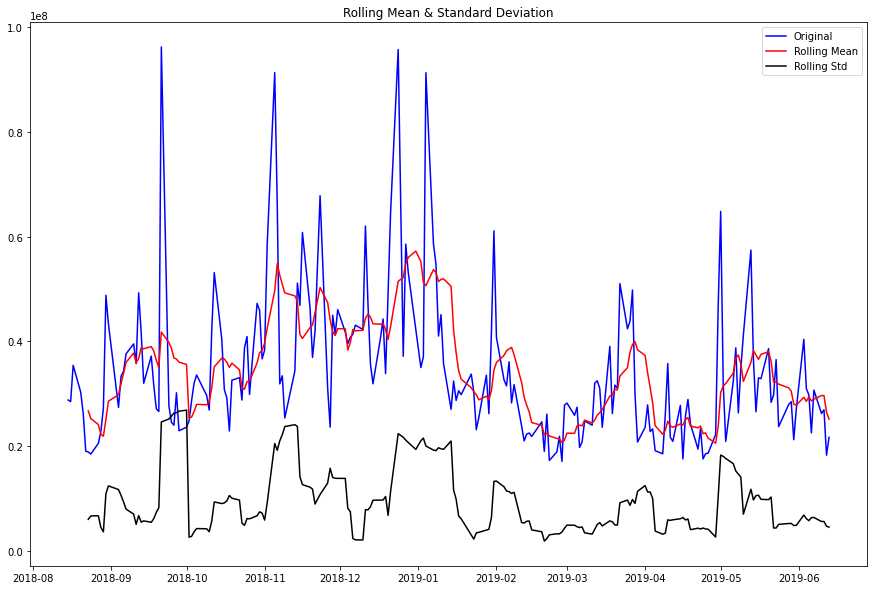

Results of Dickey-Fuller Test:
Test Statistic                  -2.864792
p-value                          0.049598
#Lags Used                       6.000000
Number of Observations Used    201.000000
Critical Value (1%)             -3.463309
Critical Value (5%)             -2.876029
Critical Value (10%)            -2.574493
dtype: float64 



In [ ]:
test_stationarity(train_final['Volume'])

In [ ]:
## Series is stationary at 5% Alpha as per Dicky Fuller

In [ ]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


# Build an ARIMA model.

In [ ]:
# Creating an empty Dataframe with column names only
dfObj = pd.DataFrame(columns=['param', 'AIC'])
dfObj

Empty DataFrame
Columns: [param, AIC]
Index: []

In [ ]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train_final['Volume'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj = dfObj.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:7429.532057941741
ARIMA(0, 0, 1) - AIC:7384.221256038322
ARIMA(0, 0, 2) - AIC:7378.115357469763
ARIMA(1, 0, 0) - AIC:7372.073212600576


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

ARIMA(1, 0, 1) - AIC:7373.158386281623
ARIMA(1, 0, 2) - AIC:7365.800378313319
ARIMA(2, 0, 0) - AIC:7373.694123850221


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(2, 0, 1) - AIC:7367.0254936155425
ARIMA(2, 0, 2) - AIC:7367.695589547713


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
dfObj.sort_values(by=['AIC'])

param          AIC
5  (1, 0, 2)  7365.800378
7  (2, 0, 1)  7367.025494
8  (2, 0, 2)  7367.695590
3  (1, 0, 0)  7372.073213
4  (1, 0, 1)  7373.158386
6  (2, 0, 0)  7373.694124
2  (0, 0, 2)  7378.115357
1  (0, 0, 1)  7384.221256
0  (0, 0, 0)  7429.532058

In [ ]:
## ARIMA(1,0,2) has the lowest AIC
mod = ARIMA(train_final['Volume'], order=(1,0,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                  208
Model:                     ARMA(1, 2)   Log Likelihood               -3677.900
Method:                       css-mle   S.D. of innovations       11548148.347
Date:                Sun, 31 Oct 2021   AIC                           7365.800
Time:                        03:45:14   BIC                           7382.488
Sample:                             0   HQIC                          7372.548
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.434e+07    3.2e+06     10.747      0.000    2.81e+07    4.06e+07
ar.L1.Volume     0.9467      0.040     23.526      0.000       0.868       1.026
ma.L1.Volume    -0.5244      0.080     -6.52

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
final_hat_avg =test_final.copy()
pred_ARIMA = results_Arima.forecast(steps=len(test_final))
pred_ARIMA[0]

array([27318007.33063709, 28687490.07819766, 28988370.40464019,
       29273222.93680202, 29542901.46991975, 29798214.31784351,
       30039926.73581518, 30268763.21418606, 30485409.64994893,
       30690515.40259332, 30884695.24044614, 31068531.18333127,
       31242574.24707139, 31407346.09506075, 31563340.60185918,
       31711025.33349402, 31850842.94890684, 31983212.52674554,
       32108530.82147874, 32227173.45259731, 32339496.03046755,
       32445835.22221059, 32546509.76080272, 32641821.40042122,
       32732055.82089941, 32817483.48400145, 32898360.4440839 ,
       32974929.11557341, 33047418.99956129, 33116047.37169252,
       33181019.93341121, 33242531.42851437, 33300766.22686216,
       33355898.87699397, 33408094.62930693, 33457509.93136483,
       33504292.89682211, 33548583.7493684 , 33590515.24302433,
       33630213.06004826, 33667796.18764675, 33703377.27461767,
       33737062.96899515])

In [ ]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test_final.Volume,pred_ARIMA[0]))
print(rmse)

13416734.377030624


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(1, 0, 2)'])

resultsDf

Test RMSE
ARIMA(1, 0, 2)  1.341673e+07

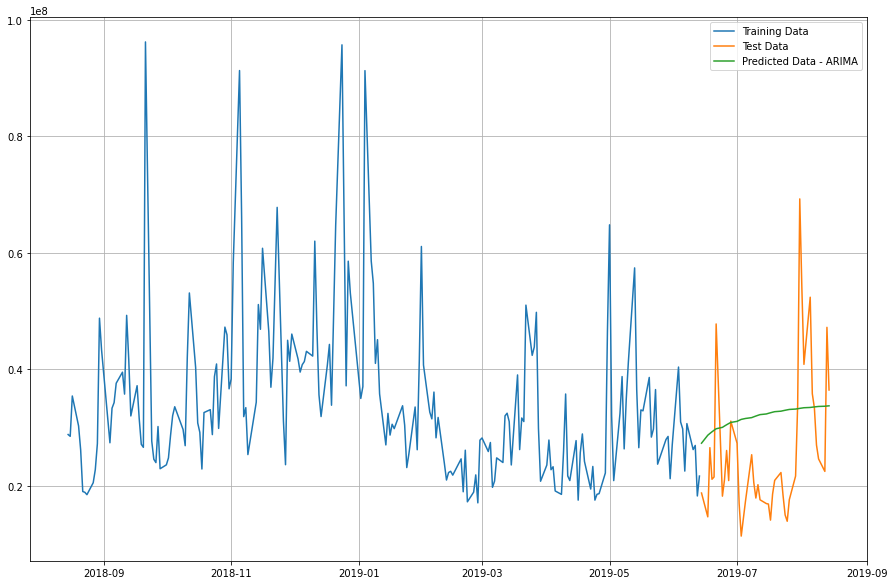

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Build an SARIMA model.

In [ ]:
### As the dataset has seasonality.. Let's build the model with SARIMA
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:7803.902158390863
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:7516.843047531702
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:7311.014474314488
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:7335.756112170122
SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:7240.848774197254
SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:7067.255496879528
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:7120.87452132768
SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:7101.754037207331


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:7069.848627478324
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:7643.903618065291
SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:7432.848224473373
SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:7241.97855395312
SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:7482.677398931115


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:7401.246131356326
SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:7218.723683044125
SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:7295.362488980223


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:7293.113004755258


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:7220.030979839252
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:7579.195547009651
SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:7385.377098829438


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:7200.696127783103
SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:7486.688579677628
SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:7368.85576523987


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:7186.08330821864
SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:7299.85003587119


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:7297.331773703551


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:7187.372886135085
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:7387.116568320252
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:7215.043134007794
SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:7041.005271647404
SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:7215.058330973905


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:7195.442027579004
SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:7022.169522872559


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:7040.7971336923165


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:7022.177154221707


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:7023.0074461331715
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:7312.772230021369
SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:7137.5258153544


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:6961.28661838857
SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:7173.041387860919


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:7146.1811504265315


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:6969.473297817771
SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:7000.578933632825


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:6998.9877313456545


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:6968.955372083422
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:7263.70665855886
SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:7091.746463145265


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:6914.849721182999
SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:7161.423923782934


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:7104.688066618465


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:6929.774699547592


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:6989.31117488569


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:6987.85838469263


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:6924.302971600587
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:7340.223467609073
SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:7202.277622755119
SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:7028.933671101032


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:7167.835351502853
SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:7161.057783640954


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:7022.5128548769335
SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:6990.399041050345


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:6982.574014090964


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:6983.068932807803
SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:7766.277317851325


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:7439.5650239073175


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:7218.865612679609


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:7127.425960659399


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:7129.419215034146


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:6965.284736046187
SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:7032.859554911043

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:6964.018633102452


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:6960.373929185411
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:7265.503126092927
SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:7092.752414342643


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:6916.638345554458


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:7127.911349480363


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:7105.977989745301


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:6931.614277900328


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:6952.429104213317


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:6953.657885121345
SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:6926.05867341798


In [ ]:
dfObj2.sort_values(by=['AIC'])

param      seasonal          AIC
47  (1, 0, 2)  (0, 0, 2, 5)  6914.849721
74  (2, 0, 2)  (0, 0, 2, 5)  6916.638346
53  (1, 0, 2)  (2, 0, 2, 5)  6924.302972
80  (2, 0, 2)  (2, 0, 2, 5)  6926.058673
50  (1, 0, 2)  (1, 0, 2, 5)  6929.774700
..        ...           ...          ...
1   (0, 0, 0)  (0, 0, 1, 5)  7516.843048
18  (0, 0, 2)  (0, 0, 0, 5)  7579.195547
9   (0, 0, 1)  (0, 0, 0, 5)  7643.903618
63  (2, 0, 1)  (0, 0, 0, 5)  7766.277318
0   (0, 0, 0)  (0, 0, 0, 5)  7803.902158

[81 rows x 3 columns]

In [ ]:
## SARIMA(1,0,2)(0,0,2,5) - AIC:6914.849775
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'],
                                order=(1,0,2),
                                seasonal_order=(0,0,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                 Statespace Model Results                                
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3451.425
Date:                           Sun, 31 Oct 2021   AIC                           6914.850
Time:                                   03:45:33   BIC                           6934.488
Sample:                                        0   HQIC                          6922.801
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9984      0.004    225.747      0.000       0.990       1.007
ma.L1         -0.5659      0.056    -10.017

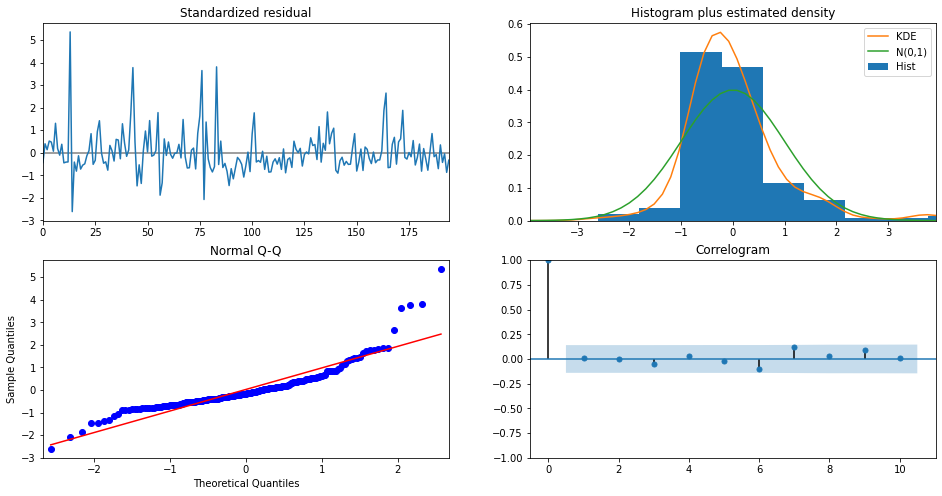

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
final_hat_avg =test_final.copy()
pred_SARIMA = results.get_forecast(steps=len(test_final))
pred_SARIMA.predicted_mean

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208    2.551003e+07
209    2.511785e+07
210    2.604911e+07
211    2.666029e+07
212    2.748773e+07
213    2.606341e+07
214    2.666625e+07
215    2.646033e+07
216    2.754788e+07
217    2.723576e+07
218    2.655621e+07
219    2.638135e+07
220    2.633860e+07
221    2.629591e+07
222    2.625329e+07
223    2.621073e+07
224    2.616825e+07
225    2.612584e+07
226    2.608349e+07
227    2.604122e+07
228    2.599901e+07
229    2.595687e+07
230    2.591480e+07
231    2.587280e+07
232    2.583086e+07
233    2.578900e+07
234    2.574720e+07
235    2.570547e+07
236    2.566380e+07
237    2.562221e+07
238    2.558068e+07
239    2.553922e+07
240    2.549782e+07
241    2.545650e+07
242    2.541524e+07
243    2.537404e+07
244    2.533292e+07
245    2.529186e+07
246    2.525087e+07
247    2.520994e+07
248    2.516908e+07
249    2.512829e+07
250    2.508756e+07
dtype: float64

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final.Volume,pred_SARIMA.predicted_mean))
print(rmse)

12586000.733148811


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(1, 0, 2)(0, 0, 2)5'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)             1.341673e+07
SARIMA(1, 0, 2)(0, 0, 2)5  1.258600e+07

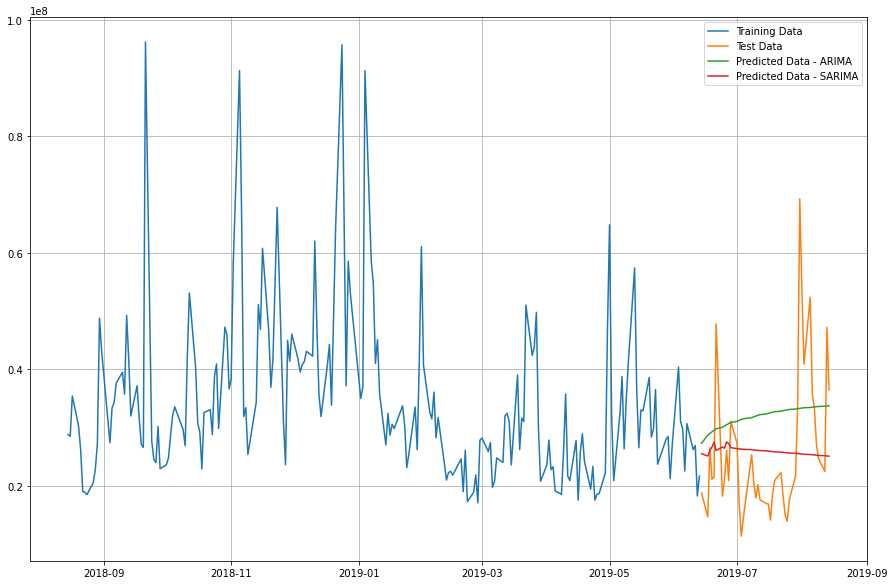

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [ ]:
## RMSE has reduced in comparison to ARIMA when seasonality was introduced

# Build a SARIMAX model.

In [ ]:
### Let's create exogeneous variables

ex_train=train[['High','Low']]
ex_test=test[['High','Low']]
ex_train.head()

High         Low
Time_Stamp                        
2018-08-15  210.740005  208.330002
2018-08-16  213.809998  211.470001
2018-08-17  217.949997  213.160004
2018-08-20  219.179993  215.110001
2018-08-21  217.190002  214.029999

In [ ]:
dfObj3 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj3

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
## Let's first use SARIMAX with exogenous variable 
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Volume'],exog=ex_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMAX = mod.fit()
        print('SARIMA{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        dfObj3 = dfObj3.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

SARIMA(0, 0, 0)(0, 0, 0, 5) - AIC:8220.439307896286
SARIMA(0, 0, 0)(0, 0, 1, 5) - AIC:7146.76904937006
SARIMA(0, 0, 0)(0, 0, 2, 5) - AIC:6973.675219174671
SARIMA(0, 0, 0)(1, 0, 0, 5) - AIC:7180.2060506566095
SARIMA(0, 0, 0)(1, 0, 1, 5) - AIC:7140.214862591106
SARIMA(0, 0, 0)(1, 0, 2, 5) - AIC:6969.373288041528


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)(2, 0, 0, 5) - AIC:7005.807851815782
SARIMA(0, 0, 0)(2, 0, 1, 5) - AIC:7003.43862030498


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)(2, 0, 2, 5) - AIC:6963.981257930326
SARIMA(0, 0, 1)(0, 0, 0, 5) - AIC:7266.466891877488
SARIMA(0, 0, 1)(0, 0, 1, 5) - AIC:7093.3148560488025
SARIMA(0, 0, 1)(0, 0, 2, 5) - AIC:6922.054987010522


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)(1, 0, 0, 5) - AIC:7162.336463345245
SARIMA(0, 0, 1)(1, 0, 1, 5) - AIC:7091.6199091694425


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)(1, 0, 2, 5) - AIC:6920.715937319921
SARIMA(0, 0, 1)(2, 0, 0, 5) - AIC:6990.991123660683


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)(2, 0, 1, 5) - AIC:6990.3611467145


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)(2, 0, 2, 5) - AIC:6922.054949329381
SARIMA(0, 0, 2)(0, 0, 0, 5) - AIC:7228.873007460348
SARIMA(0, 0, 2)(0, 0, 1, 5) - AIC:7057.612581905885


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)(0, 0, 2, 5) - AIC:6885.362025266868
SARIMA(0, 0, 2)(1, 0, 0, 5) - AIC:7161.07295116774


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)(1, 0, 1, 5) - AIC:7056.719525741492


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)(1, 0, 2, 5) - AIC:6884.313069281112
SARIMA(0, 0, 2)(2, 0, 0, 5) - AIC:6990.07533509787


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)(2, 0, 1, 5) - AIC:6989.613668100723


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)(2, 0, 2, 5) - AIC:6885.781537447481
SARIMA(1, 0, 0)(0, 0, 0, 5) - AIC:7293.182651274299
SARIMA(1, 0, 0)(0, 0, 1, 5) - AIC:7122.563121480967
SARIMA(1, 0, 0)(0, 0, 2, 5) - AIC:6952.317767376767


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)(1, 0, 0, 5) - AIC:7122.49020572597
SARIMA(1, 0, 0)(1, 0, 1, 5) - AIC:7122.0316648790085


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)(1, 0, 2, 5) - AIC:6951.560954187531
SARIMA(1, 0, 0)(2, 0, 0, 5) - AIC:6952.140641780617


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)(2, 0, 1, 5) - AIC:6951.6015343535655


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)(2, 0, 2, 5) - AIC:6953.180227756586
SARIMA(1, 0, 1)(0, 0, 0, 5) - AIC:7251.074495835033


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(0, 0, 1, 5) - AIC:7079.076442227177


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(0, 0, 2, 5) - AIC:6908.765859949615
SARIMA(1, 0, 1)(1, 0, 0, 5) - AIC:7113.735374492475


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(1, 0, 1, 5) - AIC:7080.973702329375


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(1, 0, 2, 5) - AIC:6909.849753322349


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(2, 0, 0, 5) - AIC:6943.266684072729


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(2, 0, 1, 5) - AIC:6945.08583179632


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)(2, 0, 2, 5) - AIC:6902.4828942169515
SARIMA(1, 0, 2)(0, 0, 0, 5) - AIC:7215.087510251137


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(0, 0, 1, 5) - AIC:7044.25218683711


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(0, 0, 2, 5) - AIC:6872.113319297305
SARIMA(1, 0, 2)(1, 0, 0, 5) - AIC:7113.081311879597


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(1, 0, 1, 5) - AIC:7046.150409355965


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(1, 0, 2, 5) - AIC:6873.443826515968


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(2, 0, 0, 5) - AIC:6942.654368206958


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(2, 0, 1, 5) - AIC:6943.921975261217


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)(2, 0, 2, 5) - AIC:6875.3424239311025
SARIMA(2, 0, 0)(0, 0, 0, 5) - AIC:7257.838452716163
SARIMA(2, 0, 0)(0, 0, 1, 5) - AIC:7122.246219453078


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)(0, 0, 2, 5) - AIC:6952.326939853005
SARIMA(2, 0, 0)(1, 0, 0, 5) - AIC:7087.823597805569


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)(1, 0, 1, 5) - AIC:7087.973270579231


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)(1, 0, 2, 5) - AIC:6951.748749239998
SARIMA(2, 0, 0)(2, 0, 0, 5) - AIC:6917.637381664117


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)(2, 0, 1, 5) - AIC:6917.262503452232


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)(2, 0, 2, 5) - AIC:6919.656666143865
SARIMA(2, 0, 1)(0, 0, 0, 5) - AIC:7249.711589566405


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(0, 0, 1, 5) - AIC:7078.615416993856


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(0, 0, 2, 5) - AIC:6908.150532568575
SARIMA(2, 0, 1)(1, 0, 0, 5) - AIC:7078.65818835966


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(1, 0, 1, 5) - AIC:7080.544718807


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(1, 0, 2, 5) - AIC:6909.4075045676655


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(2, 0, 0, 5) - AIC:6908.070103703681


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(2, 0, 1, 5) - AIC:6909.342806498522


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)(2, 0, 2, 5) - AIC:6911.26905870656
SARIMA(2, 0, 2)(0, 0, 0, 5) - AIC:7217.081722905073


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(0, 0, 1, 5) - AIC:7046.248715111931


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(0, 0, 2, 5) - AIC:6874.101786923335


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(1, 0, 0, 5) - AIC:7080.563351552782


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(1, 0, 1, 5) - AIC:7048.145505670989


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(1, 0, 2, 5) - AIC:6875.432041001346


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(2, 0, 0, 5) - AIC:6909.9056123057235


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(2, 0, 1, 5) - AIC:6911.219587443322


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)(2, 0, 2, 5) - AIC:6875.337651318326


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
dfObj3.sort_values(by=['AIC'])

param      seasonal          AIC
47  (1, 0, 2)  (0, 0, 2, 5)  6872.113319
50  (1, 0, 2)  (1, 0, 2, 5)  6873.443827
74  (2, 0, 2)  (0, 0, 2, 5)  6874.101787
80  (2, 0, 2)  (2, 0, 2, 5)  6875.337651
53  (1, 0, 2)  (2, 0, 2, 5)  6875.342424
..        ...           ...          ...
36  (1, 0, 1)  (0, 0, 0, 5)  7251.074496
54  (2, 0, 0)  (0, 0, 0, 5)  7257.838453
9   (0, 0, 1)  (0, 0, 0, 5)  7266.466892
27  (1, 0, 0)  (0, 0, 0, 5)  7293.182651
0   (0, 0, 0)  (0, 0, 0, 5)  8220.439308

[81 rows x 3 columns]

In [ ]:
## SARIMAX(1, 0, 2)(0, 0, 2, 5)
mod = sm.tsa.statespace.SARIMAX(train_final['Volume'],exog=ex_train,
                                order=(1 ,0,2),
                                seasonal_order=(0,0,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                 Statespace Model Results                                
Dep. Variable:                            Volume   No. Observations:                  208
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood               -3428.057
Date:                           Sun, 31 Oct 2021   AIC                           6872.113
Time:                                   03:45:59   BIC                           6898.297
Sample:                                        0   HQIC                          6882.715
                                           - 208                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
High        4.931e+06   1.12e+04    440.065      0.000    4.91e+06    4.95e+06
Low        -4.861e+06   1.07e+04   -453.684

In [ ]:
pred_SARIMAX = results.get_forecast(steps=len(test),exog=ex_test)
pred_SARIMAX.predicted_mean

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



208    2.571885e+07
209    2.410352e+07
210    3.522118e+07
211    2.343559e+07
212    2.386762e+07
213    2.461275e+07
214    2.096889e+07
215    3.032343e+07
216    2.933155e+07
217    2.150419e+07
218    2.349397e+07
219    3.067077e+07
220    2.059923e+07
221    2.067655e+07
222    2.289121e+07
223    2.664668e+07
224    2.531870e+07
225    2.296952e+07
226    2.556338e+07
227    2.132468e+07
228    2.185983e+07
229    2.553500e+07
230    2.168247e+07
231    2.354482e+07
232    3.317025e+07
233    3.074675e+07
234    2.119419e+07
235    2.300992e+07
236    2.563979e+07
237    2.610855e+07
238    2.432063e+07
239    2.748877e+07
240    6.341099e+07
241    6.914593e+07
242    3.682318e+07
243    4.248668e+07
244    3.256526e+07
245    4.101547e+07
246    3.354960e+07
247    3.027027e+07
248    2.748011e+07
249    7.079772e+07
250    3.246324e+07
dtype: float64

In [ ]:
rmse = sqrt(mean_squared_error(test_final.Volume,pred_SARIMAX.predicted_mean))
print(rmse)

8368171.066226182


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMAX(1, 0, 2)(0, 0, 2)5'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)              1.341673e+07
SARIMA(1, 0, 2)(0, 0, 2)5   1.258600e+07
SARIMAX(1, 0, 2)(0, 0, 2)5  8.368171e+06

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();

In [ ]:
# Build Time Series models using the Prophet Library.

In [ ]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.date_range(start='8/15/2018', end='8/14/2019', freq=us_bd)
df_prophet['y'] = df['Volume']
df_prophet['High']= df['High']
df_prophet['Low']=df['Low']
df_prophet.head()

ds         y        High         Low
0 2018-08-15  28807600  210.740005  208.330002
1 2018-08-16  28500400  213.809998  211.470001
2 2018-08-17  35427000  217.949997  213.160004
3 2018-08-20  30287700  219.179993  215.110001
4 2018-08-21  26159800  217.190002  214.029999

In [ ]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      251 non-null    datetime64[ns]
 1   y       251 non-null    int64         
 2   High    251 non-null    float64       
 3   Low     251 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 8.0 KB


In [ ]:
nfb = len(df_prophet)
df_prophet[0:int(n*0.83)]

ds         y        High         Low
0   2018-08-15  28807600  210.740005  208.330002
1   2018-08-16  28500400  213.809998  211.470001
2   2018-08-17  35427000  217.949997  213.160004
3   2018-08-20  30287700  219.179993  215.110001
4   2018-08-21  26159800  217.190002  214.029999
..         ...       ...         ...         ...
203 2019-06-07  30684400  191.919998  185.770004
204 2019-06-10  26220900  195.369995  191.619995
205 2019-06-11  26932900  196.000000  193.600006
206 2019-06-12  18253200  195.970001  193.389999
207 2019-06-13  21674600  196.789993  193.600006

[208 rows x 4 columns]

In [ ]:
# prophet=Prophet(seasonality_mode='additive',weekly_seasonality=True)
# prophet.add_country_holidays(country_name='US')
# # prophet.fit(df_prophet[df_prophet['ds'] <=('2019-06-13')])
# prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2019-06-13')])
# # prophet.fit(df_prophet[0:int(n*0.83)])
# forecast= prophet.predict(df_prophet[['ds']])
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


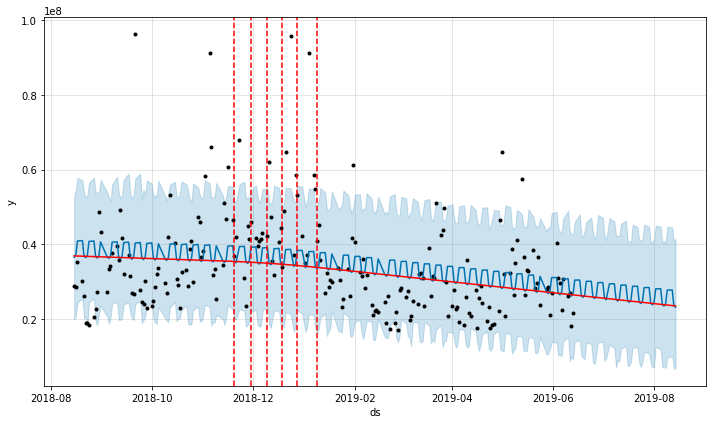

In [ ]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=True)
prophet.add_country_holidays(country_name='US')
# prophet.fit(df_prophet[df_prophet['ds'] <=('2019-06-13')])
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2019-06-13')])
# prophet.fit(df_prophet[0:int(n*0.83)])
future = prophet.make_future_dataframe(periods=43, freq=us_bd)

forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

Prophet has included the original data as the black dots and the blue line is the forecast model.

The light blue area is the confidence interval. Using the add_changepoints_to_plot function added the red lines; the vertical dashed lines are changepoints Prophet identified where the trend changed, and the solid red line is the trend with all seasonality removed. 


The components plot consists of 3 sections: the trend, the holidays, and the seasonality. The sum of those 3 components account for the entirety of the model in fact. The trend is simply what the data is showing if you subtract out all of the other components. 

The holidays plot shows the effect of all of the holidays included in the model. Holidays, as implemented in Prophet, can be thought of as unnatural events when the trend will deviate from the baseline but return once the event is over.

The weekly seasonality component shows the change in volumne over 
the week, but with a steep decline on the weekend. 

In [ ]:
import holidays
for date, name in sorted(holidays.US(state='NY', years=2018).items()):
   print(date, name) 

2018-01-01 New Year's Day
2018-01-15 Martin Luther King Jr. Day
2018-02-12 Lincoln's Birthday
2018-02-15 Susan B. Anthony Day
2018-02-19 Washington's Birthday
2018-05-28 Memorial Day
2018-07-04 Independence Day
2018-09-03 Labor Day
2018-10-08 Columbus Day
2018-11-06 Election Day
2018-11-11 Veterans Day
2018-11-12 Veterans Day (Observed)
2018-11-22 Thanksgiving
2018-12-25 Christmas Day


In [ ]:
forecast

ds         trend  ...  multiplicative_terms_upper          yhat
0   2018-08-15  3.692715e+07  ...                         0.0  3.656832e+07
1   2018-08-16  3.691230e+07  ...                         0.0  3.720686e+07
2   2018-08-17  3.689746e+07  ...                         0.0  4.090203e+07
3   2018-08-20  3.685293e+07  ...                         0.0  4.101854e+07
4   2018-08-21  3.683809e+07  ...                         0.0  3.686480e+07
..         ...           ...  ...                         ...           ...
246 2019-08-08  2.383195e+07  ...                         0.0  2.412650e+07
247 2019-08-09  2.378434e+07  ...                         0.0  2.778891e+07
248 2019-08-12  2.364151e+07  ...                         0.0  2.780712e+07
249 2019-08-13  2.359390e+07  ...                         0.0  2.362062e+07
250 2019-08-14  2.354629e+07  ...                         0.0  2.318746e+07

[251 rows x 52 columns]

In [ ]:
rmse = sqrt(mean_squared_error(test_final['Volume'],forecast.tail(43)['yhat']))
print(rmse)

13015976.935114387


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)              1.341673e+07
SARIMA(1, 0, 2)(0, 0, 2)5   1.258600e+07
SARIMAX(1, 0, 2)(0, 0, 2)5  8.368171e+06
Prophet                     1.301598e+07

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet')
plt.legend(loc='best')
plt.grid();

Additional Regressor: If you have independent variables apart from the target forcasted variables, you can add thems as a regressor variables.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


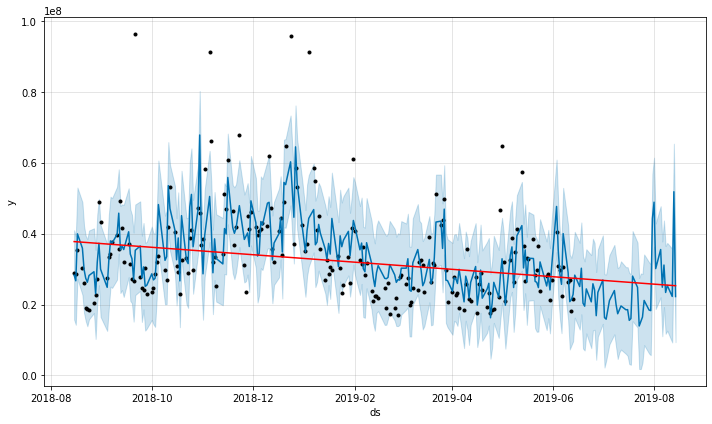

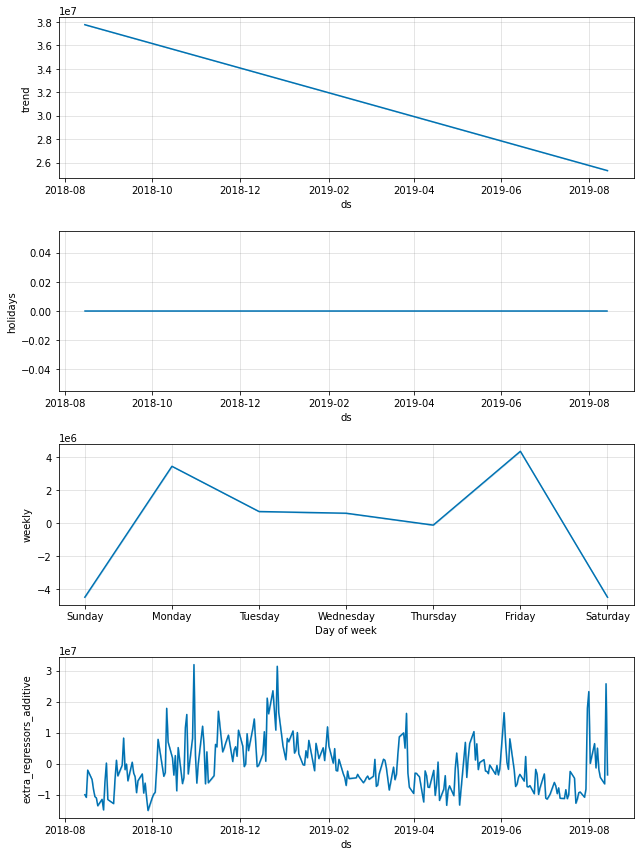

In [ ]:
prophet=Prophet()
prophet.add_country_holidays(country_name='US')
prophet.add_regressor('High')
prophet.add_regressor('Low')
prophet.fit(df_prophet[df_prophet['ds'] < pd.to_datetime('2019-06-14')])
future = prophet.make_future_dataframe(periods=43, freq=us_bd)
future['High']= df_prophet['High']
future['Low']= df_prophet['Low']
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()


In [ ]:
rmse = sqrt(mean_squared_error(test_final['Volume'],forecast.tail(43)['yhat']))
print(rmse)

7917735.4736055685


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Prophet - with exog variables'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)                 1.341673e+07
SARIMA(1, 0, 2)(0, 0, 2)5      1.258600e+07
SARIMAX(1, 0, 2)(0, 0, 2)5     8.368171e+06
Prophet                        1.301598e+07
Prophet - with exog variables  7.917735e+06

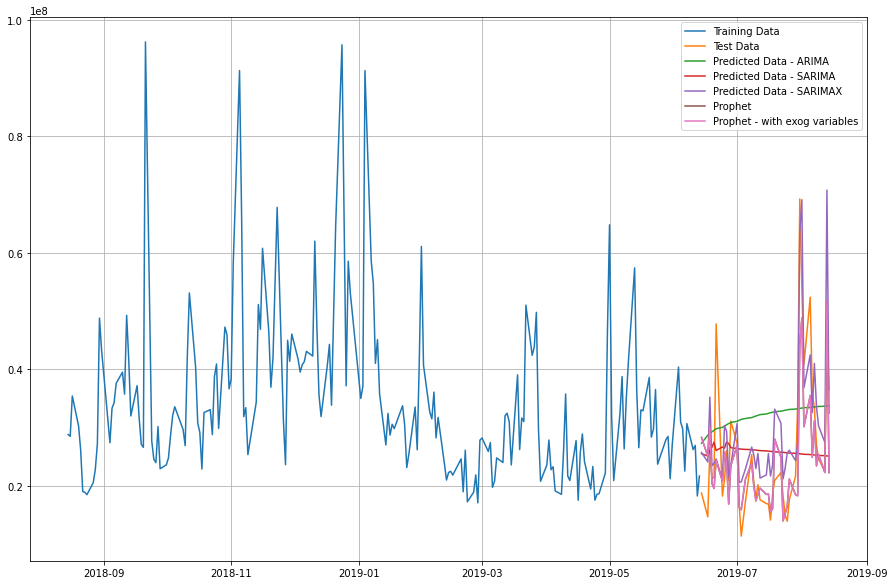

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet - with exog variables')
plt.legend(loc='best')
plt.grid();

Adjusting trend by changepoint_prior_scale: Prophet allow you to adjust the trend in case there is an overfit or underfit. changepoint_prior_scale helps adjust the strength of the trend.
Default value for changepoint_prior_scale is 0.05. Decrease the value to make the trend less flexible. Increase the value of changepoint_prior_scale to make the trend more flexible.
Increasing the changepoint_prior_scale to 0.08 to make the trend flexible


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


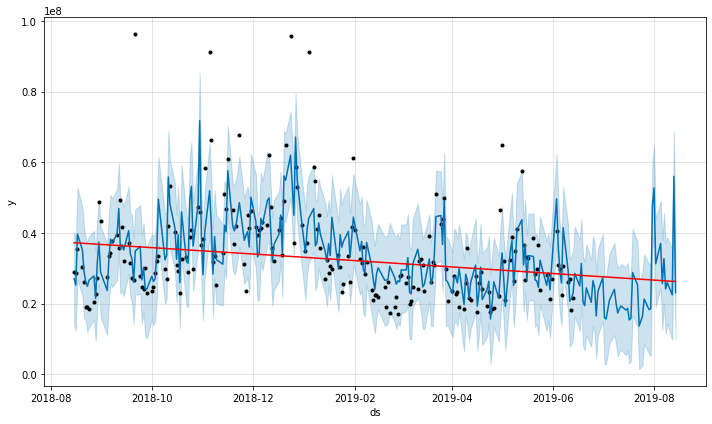

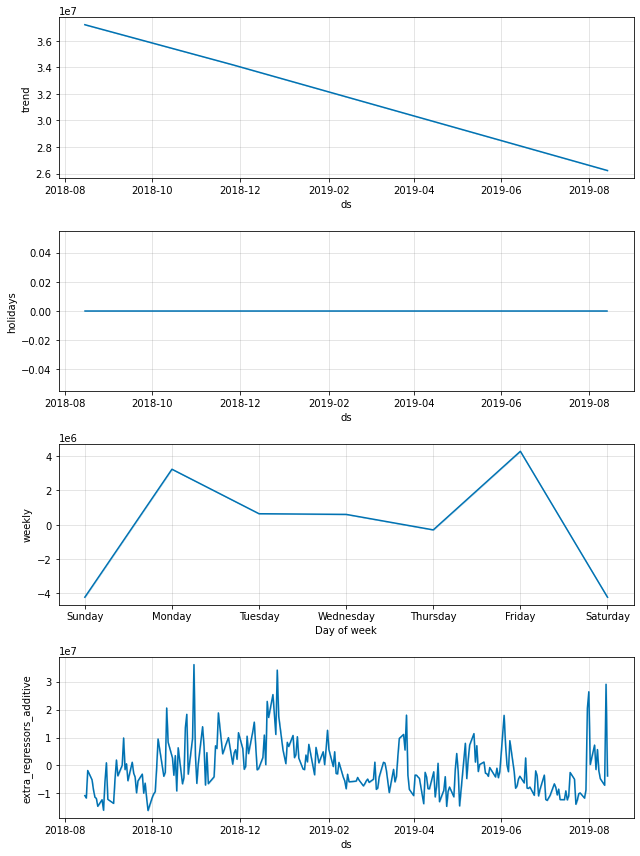

In [ ]:
prophet=Prophet(changepoint_prior_scale=.08,
                  )
prophet.add_country_holidays(country_name='US')
prophet.add_regressor('High')
prophet.add_regressor('Low')
prophet.fit(df_prophet[df_prophet['ds'] < pd.to_datetime('2019-06-14')])
future = prophet.make_future_dataframe(periods=43, freq=us_bd)
future['High']= df_prophet['High']
future['Low']= df_prophet['Low']
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()


In [ ]:
rmse = sqrt(mean_squared_error(test_final['Volume'],forecast.tail(43)['yhat']))
print(rmse)

7577200.555105461


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Prophet - with exog variables_2.0'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
ARIMA(1, 0, 2)                     1.341673e+07
SARIMA(1, 0, 2)(0, 0, 2)5          1.258600e+07
SARIMAX(1, 0, 2)(0, 0, 2)5         8.368171e+06
Prophet                            1.301598e+07
Prophet - with exog variables      7.917735e+06
Prophet - with exog variables_2.0  7.577201e+06

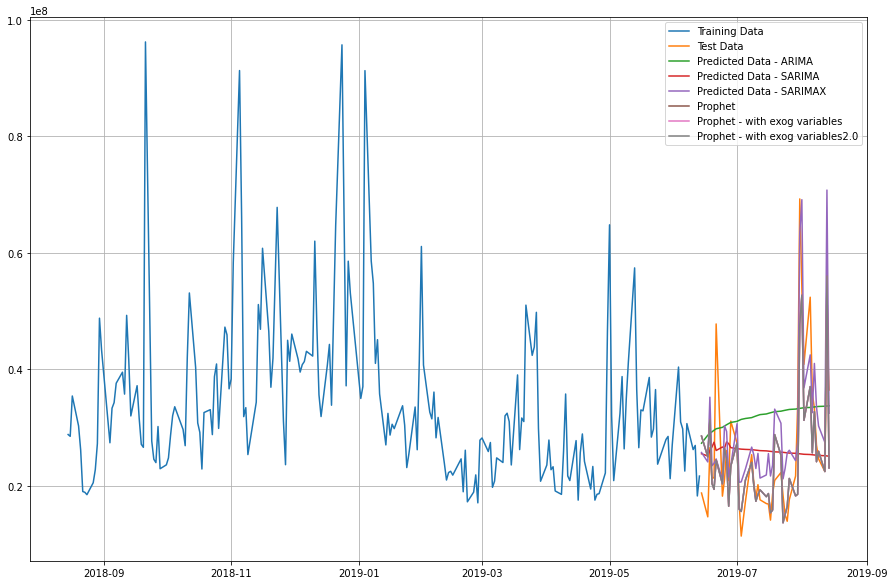

In [ ]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet - with exog variables')
plt.plot(test_final.index,forecast.tail(43)['yhat'],label='Prophet - with exog variables2.0')
plt.legend(loc='best')
plt.grid();

In [ ]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [ ]:
from datetime import date
import holidays

In [ ]:
india_holidays = holidays.HolidayBase()

In [ ]:
india_holidays.append('26-01-2019')

In [ ]:
india_holidays

{datetime.date(2019, 1, 26): 'Holiday'}

In [ ]:
# Add list of Dates Together
india_holidays.append(['02-10-2018', '15-08-2018'])

In [ ]:
india_holidays

{datetime.date(2018, 2, 10): 'Holiday',
 datetime.date(2018, 8, 15): 'Holiday',
 datetime.date(2019, 1, 26): 'Holiday'}